# Assignment-17-Support-Vector-Machine (Forestfires)

In [1]:
# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing Data

In [4]:
df= pd.read_csv("forestfires.csv")
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [5]:
print('No. of observations:{}\nNo. of features:{}'.format(df.shape[0],df.shape[1]))

No. of observations:517
No. of features:31


In [6]:
df[df.columns[0:11]].describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [7]:
df[df.columns[0:11]].isnull().sum()

month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

### Finding Correlation

In [9]:
corr= df.corr(numeric_only=True)

<Axes: >

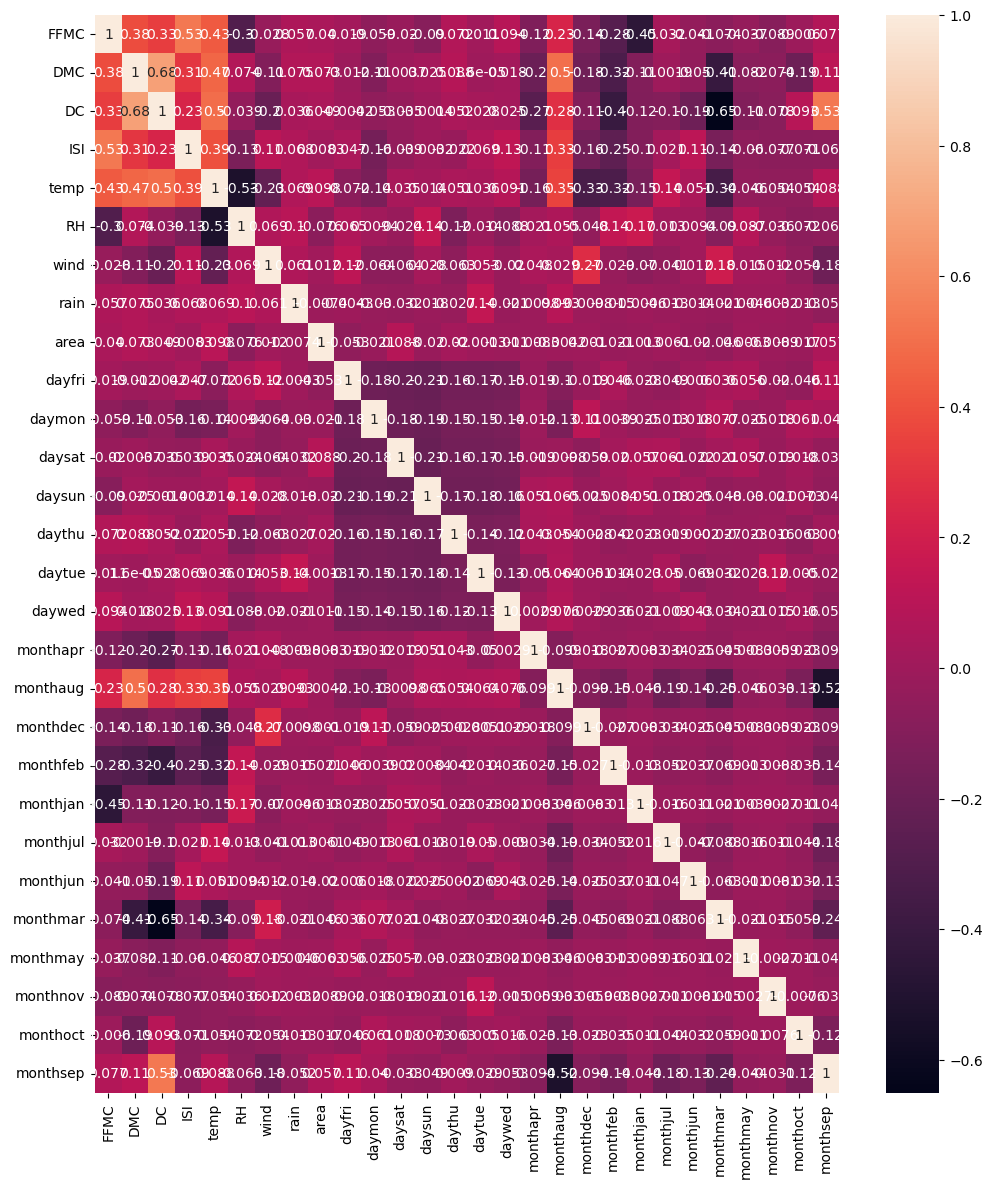

In [10]:
plt.figure(figsize=(12,14))
sns.heatmap(corr,annot=True)

## SVM

In [11]:
X= df.iloc[:,2:30]
y= df.iloc[:,30]

In [12]:
mapping= {'small': 1, 'large': 2}

In [13]:
y= y.replace(mapping)

In [14]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size= 0.20, random_state=1)

### 1 Linear

In [20]:
model_linear= SVC(kernel= "linear")
model_linear.fit(x_train,y_train)
y_pred= model_linear.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.75


## 2 Poly

In [21]:
model_poly= SVC(kernel= "poly")
model_poly.fit(x_train,y_train)
y_pred= model_poly.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7884615384615384


### 3 RBF

In [22]:
model_rbf= SVC(kernel= "rbf")
model_rbf.fit(x_train,y_train)
y_pred_rbf= model_rbf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rbf))

Accuracy: 0.7788461538461539


### 4 Sigmoid

In [23]:
model_sigmoid= SVC(kernel= "sigmoid")
model_sigmoid.fit(x_train,y_train)
y_pred_sigmoid= model_sigmoid.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_sigmoid))

Accuracy: 0.7403846153846154


## Conclusion
###### Linear Model gives the best accuracy.
